In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize SparkSession
spark = SparkSession.builder.appName("NBA Predictions").getOrCreate()

# Path to the cleaned CSV file
csv_path = "file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_games_cleaned.csv"

# Load the dataset
df = spark.read.csv(csv_path, header=True, inferSchema=True)

# Ensure all necessary columns are present and clean
df = df.select(
    "team", "team_opp", "won", "home",  # Team identifiers and label
    # Team stats
    "fg", "fga", "fg%", "3p", "3pa", "3p%", "ft", "fta", "ft%", 
    "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts", 
    "ts%", "efg%", "3par", "ftr",
    # Opponent stats
    "fg_opp", "fga_opp", "fg%_opp", "3p_opp", "3pa_opp", "3p%_opp", "ft_opp", "fta_opp", "ft%_opp",
    "orb_opp", "drb_opp", "trb_opp", "ast_opp", "stl_opp", "blk_opp", "tov_opp", "pf_opp", "pts_opp",
    "ts%_opp", "efg%_opp", "3par_opp", "ftr_opp"
)

# Convert "won" column to double (required by the model)
df = df.withColumn("won", col("won").cast("double"))

# Display the schema to verify the stats are included
df.printSchema()

# Display a few rows of data to confirm
df.show(5)



24/11/15 09:24:33 WARN Utils: Your hostname, Sumedhs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.74.22.118 instead (on interface en0)
24/11/15 09:24:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/15 09:24:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- team: string (nullable = true)
 |-- team_opp: string (nullable = true)
 |-- won: double (nullable = true)
 |-- home: integer (nullable = true)
 |-- fg: double (nullable = true)
 |-- fga: double (nullable = true)
 |-- fg%: double (nullable = true)
 |-- 3p: double (nullable = true)
 |-- 3pa: double (nullable = true)
 |-- 3p%: double (nullable = true)
 |-- ft: double (nullable = true)
 |-- fta: double (nullable = true)
 |-- ft%: double (nullable = true)
 |-- orb: double (nullable = true)
 |-- drb: double (nullable = true)
 |-- trb: double (nullable = true)
 |-- ast: double (nullable = true)
 |-- stl: double (nullable = true)
 |-- blk: double (nullable = true)
 |-- tov: double (nullable = true)
 |-- pf: double (nullable = true)
 |-- pts: double (nullable = true)
 |-- ts%: double (nullable = true)
 |-- efg%: double (nullable = true)
 |-- 3par: double (nullable = true)
 |-- ftr: double (nullable = true)
 |-- fg_opp: double (nullable = true)
 |-- fga_opp: double (nullable = true)
 |

24/11/15 09:24:37 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+--------+---+----+----+-----+-----+---+----+-----+----+----+-----+----+----+----+----+---+----+----+----+-----+-----+-----+-----+-----+------+-------+-------+------+-------+-------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+--------+--------+-------+
|team|team_opp|won|home|  fg|  fga|  fg%| 3p| 3pa|  3p%|  ft| fta|  ft%| orb| drb| trb| ast|stl| blk| tov|  pf|  pts|  ts%| efg%| 3par|  ftr|fg_opp|fga_opp|fg%_opp|3p_opp|3pa_opp|3p%_opp|ft_opp|fta_opp|ft%_opp|orb_opp|drb_opp|trb_opp|ast_opp|stl_opp|blk_opp|tov_opp|pf_opp|pts_opp|ts%_opp|efg%_opp|3par_opp|ftr_opp|
+----+--------+---+----+----+-----+-----+---+----+-----+----+----+-----+----+----+----+----+---+----+----+----+-----+-----+-----+-----+-----+------+-------+-------+------+-------+-------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+--------+--------+-------+
| ATL|     DAL|1.0|   0|39.0| 81.0|0.481|6.0|20.0|  

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 55736)
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/socketserver.py", line 720, in __init__
    self.handle()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/Library/Frameworks/Python.framew

In [5]:
from pyspark.ml.feature import VectorAssembler

# Define the feature columns
feature_cols = [
    # Team stats
    "fg", "fga", "fg%", "3p", "3pa", "3p%", "ft", "fta", "ft%", 
    "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts", 
    "ts%", "efg%", "3par", "ftr",
    # Opponent stats
    "fg_opp", "fga_opp", "fg%_opp", "3p_opp", "3pa_opp", "3p%_opp", 
    "ft_opp", "fta_opp", "ft%_opp", "orb_opp", "drb_opp", "trb_opp", 
    "ast_opp", "stl_opp", "blk_opp", "tov_opp", "pf_opp", "pts_opp",
    "ts%_opp", "efg%_opp", "3par_opp", "ftr_opp",
    # Game context
    "home"
]

# Assemble the features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

# Show the resulting features column
df.select("features").show(truncate=False)


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                   |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[39.0,81.0,0.481,6.0,20.0,0.3,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,36.0,100.0,0.36,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.31,0.19,0.0]        |
|[36.0,100.0,0.36,7.0,31.0,0.226,16.0,19.0,0.842

In [6]:
# Split into training (80%) and testing (20%) sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)


In [7]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize the classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="won", seed=42)

# Set up the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100, 200]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .addGrid(rf.maxBins, [32, 64]) \
    .build()

# Set up the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="won", metricName="areaUnderROC")

# Cross-validation
crossval = CrossValidator(estimator=rf, 
                          estimatorParamMaps=paramGrid, 
                          evaluator=evaluator, 
                          numFolds=5)

# Train the model
cv_model = crossval.fit(train_data)

# Get the best model
best_model = cv_model.bestModel


24/11/15 09:25:51 WARN DAGScheduler: Broadcasting large task binary with size 1061.9 KiB
24/11/15 09:25:51 WARN DAGScheduler: Broadcasting large task binary with size 1842.5 KiB
24/11/15 09:25:52 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
24/11/15 09:25:53 WARN DAGScheduler: Broadcasting large task binary with size 4.3 MiB
24/11/15 09:25:54 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/11/15 09:25:55 WARN DAGScheduler: Broadcasting large task binary with size 1064.4 KiB
24/11/15 09:25:55 WARN DAGScheduler: Broadcasting large task binary with size 1833.8 KiB
24/11/15 09:25:56 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
24/11/15 09:25:56 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
24/11/15 09:25:57 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/11/15 09:25:58 WARN DAGScheduler: Broadcasting large task binary with size 1061.9 KiB
24/11/15 09:25:59 WARN DAGScheduler: Br

In [8]:
df.show(10)  # Show the first 10 rows
df.printSchema()  # Check the schema of the DataFrame


+----+--------+---+----+----+-----+-----+----+----+-----+----+----+-----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+------+-------+-------+------+-------+-------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+--------+--------+-------+--------------------+
|team|team_opp|won|home|  fg|  fga|  fg%|  3p| 3pa|  3p%|  ft| fta|  ft%| orb| drb| trb| ast| stl| blk| tov|  pf|  pts|  ts%| efg%| 3par|  ftr|fg_opp|fga_opp|fg%_opp|3p_opp|3pa_opp|3p%_opp|ft_opp|fta_opp|ft%_opp|orb_opp|drb_opp|trb_opp|ast_opp|stl_opp|blk_opp|tov_opp|pf_opp|pts_opp|ts%_opp|efg%_opp|3par_opp|ftr_opp|            features|
+----+--------+---+----+----+-----+-----+----+----+-----+----+----+-----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+------+-------+-------+------+-------+-------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+--------+--------+-------+-----

In [9]:
predictions = best_model.transform(test_data)

# Evaluate the predictions
auc = evaluator.evaluate(predictions)
print(f"Test AUC: {auc}")

24/11/15 09:42:03 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB


Test AUC: 0.9966051324582222


In [10]:
model_path = "/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_model" 
cv_model.bestModel.write().overwrite().save(model_path)
print(f"Model saved at: {model_path}")


24/11/15 09:44:16 WARN TaskSetManager: Stage 3487 contains a task of very large size (3061 KiB). The maximum recommended task size is 1000 KiB.


Model saved at: /Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_model


In [11]:
# Example: New game input
new_game_data = [
    {
        "team": "ATL", "team_opp": "DAL", "home": 1,
        "fg": 39.0, "fga": 81.0, "fg%": 0.481, "3p": 6.0, "3pa": 20.0, "3p%": 0.300,
        "ft": 14.0, "fta": 18.0, "ft%": 0.778, "orb": 6.0, "drb": 41.0, "trb": 47.0,
        "ast": 26.0, "stl": 7.0, "blk": 7.0, "tov": 14.0, "pf": 19.0, "pts": 98.0, 
        "ts%": 0.551, "efg%": 0.519, "3par": 0.247, "ftr": 0.222,
        "fg_opp": 36.0, "fga_opp": 100.0, "fg%_opp": 0.360, "3p_opp": 7.0, "3pa_opp": 31.0, 
        "3p%_opp": 0.226, "ft_opp": 16.0, "fta_opp": 19.0, "ft%_opp": 0.842, 
        "orb_opp": 20.0, "drb_opp": 31.0, "trb_opp": 51.0, "ast_opp": 18.0, "stl_opp": 7.0, 
        "blk_opp": 3.0, "tov_opp": 9.0, "pf_opp": 15.0, "pts_opp": 95.0, 
        "ts%_opp": 0.438, "efg%_opp": 0.395, "3par_opp": 0.310, "ftr_opp": 0.190
    }
]

# Convert to DataFrame
new_game_df = spark.createDataFrame(new_game_data)

# Assemble features for prediction
new_game_df = assembler.transform(new_game_df)

# Predict the outcome
new_game_predictions = best_model.transform(new_game_df)

# Add the winning team column
from pyspark.sql.functions import when
new_game_predictions = new_game_predictions.withColumn(
    "winning_team",
    when(col("prediction") == 1, col("team")).otherwise(col("team_opp"))
)

# Show the prediction
new_game_predictions.select("team", "team_opp", "winning_team", "prediction", "probability").show()


24/11/15 09:46:11 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 09:46:13 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 09:46:14 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB


+----+--------+------------+----------+--------------------+
|team|team_opp|winning_team|prediction|         probability|
+----+--------+------------+----------+--------------------+
| ATL|     DAL|         ATL|       1.0|[0.03561358142527...|
+----+--------+------------+----------+--------------------+



In [12]:
new_game_data = [
    {
        "team": "LAL", "team_opp": "BOS", "home": 1,
        "fg": 38.0, "fga": 85.0, "fg%": 0.447, "3p": 10.0, "3pa": 28.0, "3p%": 0.357,
        "ft": 20.0, "fta": 25.0, "ft%": 0.800, "orb": 8.0, "drb": 35.0, "trb": 43.0,
        "ast": 22.0, "stl": 6.0, "blk": 5.0, "tov": 12.0, "pf": 18.0, "pts": 106.0, 
        "ts%": 0.558, "efg%": 0.505, "3par": 0.330, "ftr": 0.294,
        "fg_opp": 40.0, "fga_opp": 90.0, "fg%_opp": 0.444, "3p_opp": 9.0, "3pa_opp": 27.0, 
        "3p%_opp": 0.333, "ft_opp": 15.0, "fta_opp": 19.0, "ft%_opp": 0.789, 
        "orb_opp": 10.0, "drb_opp": 36.0, "trb_opp": 46.0, "ast_opp": 24.0, "stl_opp": 8.0, 
        "blk_opp": 4.0, "tov_opp": 14.0, "pf_opp": 16.0, "pts_opp": 104.0, 
        "ts%_opp": 0.553, "efg%_opp": 0.500, "3par_opp": 0.300, "ftr_opp": 0.211
    }
]

# Convert to DataFrame
new_game_df = spark.createDataFrame(new_game_data)

# Assemble features for prediction
new_game_df = assembler.transform(new_game_df)

# Predict the outcome
new_game_predictions = best_model.transform(new_game_df)

# Add the winning team column
from pyspark.sql.functions import when
new_game_predictions = new_game_predictions.withColumn(
    "winning_team",
    when(col("prediction") == 1, col("team")).otherwise(col("team_opp"))
)

# Show the prediction
new_game_predictions.select("team", "team_opp", "winning_team", "prediction", "probability").show()


24/11/15 09:49:39 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 09:49:39 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 09:49:40 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB


+----+--------+------------+----------+--------------------+
|team|team_opp|winning_team|prediction|         probability|
+----+--------+------------+----------+--------------------+
| LAL|     BOS|         LAL|       1.0|[0.39635499142023...|
+----+--------+------------+----------+--------------------+



In [ ]:
new_game_data = [
    {
        "team": "GSW", "team_opp": "MIA", "home": 1,
        "fg": 42.0, "fga": 88.0, "fg%": 0.477, "3p": 14.0, "3pa": 35.0, "3p%": 0.400,
        "ft": 18.0, "fta": 22.0, "ft%": 0.818, "orb": 10.0, "drb": 33.0, "trb": 43.0,
        "ast": 28.0, "stl": 7.0, "blk": 5.0, "tov": 12.0, "pf": 17.0, "pts": 116.0, 
        "ts%": 0.590, "efg%": 0.545, "3par": 0.398, "ftr": 0.250,
        "fg_opp": 39.0, "fga_opp": 85.0, "fg%_opp": 0.459, "3p_opp": 12.0, "3pa_opp": 32.0, 
        "3p%_opp": 0.375, "ft_opp": 16.0, "fta_opp": 20.0, "ft%_opp": 0.800, 
        "orb_opp": 9.0, "drb_opp": 32.0, "trb_opp": 41.0, "ast_opp": 22.0, "stl_opp": 6.0, 
        "blk_opp": 4.0, "tov_opp": 14.0, "pf_opp": 18.0, "pts_opp": 110.0, 
        "ts%_opp": 0.570, "efg%_opp": 0.520, "3par_opp": 0.376, "ftr_opp": 0.235
    }
]

# Convert to DataFrame
new_game_df = spark.createDataFrame(new_game_data)

# Assemble features for prediction
new_game_df = assembler.transform(new_game_df)

# Predict the outcome
new_game_predictions = best_model.transform(new_game_df)

# Extract and add winning probability
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType

extract_win_probability = udf(lambda prob: float(prob[1]), DoubleType())
new_game_predictions = new_game_predictions.withColumn(
    "winning_probability", extract_win_probability(col("probability"))
)

# Add the winning team column
new_game_predictions = new_game_predictions.withColumn(
    "winning_team",
    when(col("prediction") == 1, col("team")).otherwise(col("team_opp"))
)

# Show the prediction
new_game_predictions.select(
    "team", "team_opp", "winning_team", "winning_probability", "prediction"
).show()


24/11/15 09:52:20 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 09:52:22 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 09:52:23 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB


+----+--------+------------+-------------------+----------+
|team|team_opp|winning_team|winning_probability|prediction|
+----+--------+------------+-------------------+----------+
| GSW|     MIA|         GSW| 0.9893692230896589|       1.0|
+----+--------+------------+-------------------+----------+



In [20]:
from pyspark.ml.classification import RandomForestClassificationModel
loaded_model = RandomForestClassificationModel.load("/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_model")
print("Model loaded successfully.")


Model loaded successfully.


In [23]:
print(spark)

In [24]:
from pyspark.ml.classification import RandomForestClassificationModel

# Load the trained model
nba_model = RandomForestClassificationModel.load("/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_model")
print("Model loaded successfully.")


Model loaded successfully.


In [25]:
print(nba_model)


RandomForestClassificationModel: uid=RandomForestClassifier_2c95ce5bb8f5, numTrees=200, numClasses=2, numFeatures=45


In [26]:
predictions = nba_model.transform(new_game_df)

# Optional: Add columns for winning team and probability
from pyspark.sql.functions import col, when, udf
from pyspark.sql.types import DoubleType

extract_win_probability = udf(lambda prob: float(prob[1]), DoubleType())

predictions = predictions.withColumn(
    "winning_probability", extract_win_probability(col("probability"))
)

predictions.select("team", "team_opp", "winning_probability", "prediction").show()


24/11/15 10:13:13 WARN DAGScheduler: Broadcasting large task binary with size 24.6 MiB
24/11/15 10:13:14 WARN DAGScheduler: Broadcasting large task binary with size 24.6 MiB
24/11/15 10:13:14 WARN DAGScheduler: Broadcasting large task binary with size 24.6 MiB


+----+--------+-------------------+----------+
|team|team_opp|winning_probability|prediction|
+----+--------+-------------------+----------+
| GSW|     MIA| 0.9893692230896589|       1.0|
+----+--------+-------------------+----------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col

# Function to fetch stats for two teams dynamically
def fetch_stats(team, team_opp):
    # Fetch stats for the home team
    team_data = df.filter(col("team") == team).groupBy("team").agg(
        avg("fg").alias("avg_fg"),
        avg("fga").alias("avg_fga"),
        avg("fg%").alias("avg_fg%"),
        avg("3p").alias("avg_3p"),
        avg("3pa").alias("avg_3pa"),
        avg("3p%").alias("avg_3p%"),
        avg("ft").alias("avg_ft"),
        avg("fta").alias("avg_fta"),
        avg("ft%").alias("avg_ft%"),
        avg("orb").alias("avg_orb"),
        avg("drb").alias("avg_drb"),
        avg("trb").alias("avg_trb"),
        avg("ast").alias("avg_ast"),
        avg("stl").alias("avg_stl"),
        avg("blk").alias("avg_blk"),
        avg("tov").alias("avg_tov"),
        avg("pf").alias("avg_pf"),
        avg("pts").alias("avg_pts"),
        avg("ts%").alias("avg_ts%"),
        avg("efg%").alias("avg_efg%"),
        avg("3par").alias("avg_3par"),
        avg("ftr").alias("avg_ftr"),
        avg("ortg").alias("avg_ortg"),
        avg("drtg").alias("avg_drtg")
    )

    # Fetch stats for the opposing team
    opp_data = df.filter(col("team") == team_opp).groupBy("team").agg(
        avg("fg").alias("avg_fg_opp"),
        avg("fga").alias("avg_fga_opp"),
        avg("fg%").alias("avg_fg%_opp"),
        avg("3p").alias("avg_3p_opp"),
        avg("3pa").alias("avg_3pa_opp"),
        avg("3p%").alias("avg_3p%_opp"),
        avg("ft").alias("avg_ft_opp"),
        avg("fta").alias("avg_fta_opp"),
        avg("ft%").alias("avg_ft%_opp"),
        avg("orb").alias("avg_orb_opp"),
        avg("drb").alias("avg_drb_opp"),
        avg("trb").alias("avg_trb_opp"),
        avg("ast").alias("avg_ast_opp"),
        avg("stl").alias("avg_stl_opp"),
        avg("blk").alias("avg_blk_opp"),
        avg("tov").alias("avg_tov_opp"),
        avg("pf").alias("avg_pf_opp"),
        avg("pts").alias("avg_pts_opp"),
        avg("ts%").alias("avg_ts%_opp"),
        avg("efg%").alias("avg_efg%_opp"),
        avg("3par").alias("avg_3par_opp"),
        avg("ftr").alias("avg_ftr_opp"),
        avg("ortg").alias("avg_ortg_opp"),
        avg("drtg").alias("avg_drtg_opp")
    )

    # Rename the "team" column in opp_data to avoid ambiguity
    opp_data = opp_data.withColumnRenamed("team", "team_opp")

    # Combine the stats for both teams
    combined_data = team_data.crossJoin(opp_data).withColumn("home", col("team") == team)
    return combined_data

# Example usage
new_game_df = fetch_stats("team", "team_opp")
new_game_df.show()



+----+------------------+-----------------+------------------+-----------------+-----------------+-------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+--------+-----------------+-----------------+------------------+------------------+-----------------+-------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+----+
|team|            avg_fg|          avg_fga|           avg_fg%|           avg_3p|    

In [31]:
from pyspark.ml.feature import VectorAssembler

# Define the feature columns (same as those used during training)
feature_cols = [
    "avg_fg", "avg_fga", "avg_fg%", "avg_3p", "avg_3pa", "avg_3p%", "avg_ft",
    "avg_fta", "avg_ft%", "avg_orb", "avg_drb", "avg_trb", "avg_ast", "avg_stl",
    "avg_blk", "avg_tov", "avg_pf", "avg_pts", "avg_ts%", "avg_efg%", "avg_3par",
    "avg_ftr", "avg_ortg", "avg_drtg", "avg_fg_opp", "avg_fga_opp", "avg_fg%_opp",
    "avg_3p_opp", "avg_3pa_opp", "avg_3p%_opp", "avg_ft_opp", "avg_fta_opp",
    "avg_ft%_opp", "avg_orb_opp", "avg_drb_opp", "avg_trb_opp", "avg_ast_opp",
    "avg_stl_opp", "avg_blk_opp", "avg_tov_opp", "avg_pf_opp", "avg_pts_opp",
    "avg_ts%_opp", "avg_efg%_opp", "avg_3par_opp", "avg_ftr_opp", "avg_ortg_opp",
    "avg_drtg_opp", "home"
]

# Create a VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Assemble features for the new game
new_game_df = assembler.transform(new_game_df)

# Use the loaded model to predict
predictions = loaded_model.transform(new_game_df)

# Extract winning probability and display predictions
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
extract_win_probability = udf(lambda prob: float(prob[1]), DoubleType())

predictions = predictions.withColumn(
    "winning_probability", extract_win_probability(col("probability"))
)

# Display the predictions
predictions.select(
    "team", "team_opp", "winning_probability", "prediction"
).show()


24/11/15 10:27:06 WARN DAGScheduler: Broadcasting large task binary with size 24.8 MiB


+----+--------+-------------------+----------+
|team|team_opp|winning_probability|prediction|
+----+--------+-------------------+----------+
| ATL|     DAL| 0.5356863476733977|       1.0|
+----+--------+-------------------+----------+



In [35]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col, udf
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler

# Function to fetch stats for two teams dynamically
def fetch_stats(team, team_opp):
    # Fetch stats for the home team
    team_data = df.filter(col("team") == team).groupBy("team").agg(
        avg("fg").alias("avg_fg"),
        avg("fga").alias("avg_fga"),
        avg("fg%").alias("avg_fg%"),
        avg("3p").alias("avg_3p"),
        avg("3pa").alias("avg_3pa"),
        avg("3p%").alias("avg_3p%"),
        avg("ft").alias("avg_ft"),
        avg("fta").alias("avg_fta"),
        avg("ft%").alias("avg_ft%"),
        avg("orb").alias("avg_orb"),
        avg("drb").alias("avg_drb"),
        avg("trb").alias("avg_trb"),
        avg("ast").alias("avg_ast"),
        avg("stl").alias("avg_stl"),
        avg("blk").alias("avg_blk"),
        avg("tov").alias("avg_tov"),
        avg("pf").alias("avg_pf"),
        avg("pts").alias("avg_pts"),
        avg("ts%").alias("avg_ts%"),
        avg("efg%").alias("avg_efg%"),
        avg("3par").alias("avg_3par"),
        avg("ftr").alias("avg_ftr"),
        avg("ortg").alias("avg_ortg"),
        avg("drtg").alias("avg_drtg")
    )

    # Fetch stats for the opposing team
    opp_data = df.filter(col("team") == team_opp).groupBy("team").agg(
        avg("fg").alias("avg_fg_opp"),
        avg("fga").alias("avg_fga_opp"),
        avg("fg%").alias("avg_fg%_opp"),
        avg("3p").alias("avg_3p_opp"),
        avg("3pa").alias("avg_3pa_opp"),
        avg("3p%").alias("avg_3p%_opp"),
        avg("ft").alias("avg_ft_opp"),
        avg("fta").alias("avg_fta_opp"),
        avg("ft%").alias("avg_ft%_opp"),
        avg("orb").alias("avg_orb_opp"),
        avg("drb").alias("avg_drb_opp"),
        avg("trb").alias("avg_trb_opp"),
        avg("ast").alias("avg_ast_opp"),
        avg("stl").alias("avg_stl_opp"),
        avg("blk").alias("avg_blk_opp"),
        avg("tov").alias("avg_tov_opp"),
        avg("pf").alias("avg_pf_opp"),
        avg("pts").alias("avg_pts_opp"),
        avg("ts%").alias("avg_ts%_opp"),
        avg("efg%").alias("avg_efg%_opp"),
        avg("3par").alias("avg_3par_opp"),
        avg("ftr").alias("avg_ftr_opp"),
        avg("ortg").alias("avg_ortg_opp"),
        avg("drtg").alias("avg_drtg_opp")
    )

    # Rename the "team" column in opp_data to avoid ambiguity
    opp_data = opp_data.withColumnRenamed("team", "team_opp")

    # Combine the stats for both teams
    combined_data = team_data.crossJoin(opp_data).withColumn("home", col("team") == team)
    return combined_data

# Example usage
new_game_df = fetch_stats("BRK", "LAL")

# Define the feature columns (same as those used during training)
feature_cols = [
    "avg_fg", "avg_fga", "avg_fg%", "avg_3p", "avg_3pa", "avg_3p%", "avg_ft",
    "avg_fta", "avg_ft%", "avg_orb", "avg_drb", "avg_trb", "avg_ast", "avg_stl",
    "avg_blk", "avg_tov", "avg_pf", "avg_pts", "avg_ts%", "avg_efg%", "avg_3par",
    "avg_ftr", "avg_ortg", "avg_drtg", "avg_fg_opp", "avg_fga_opp", "avg_fg%_opp",
    "avg_3p_opp", "avg_3pa_opp", "avg_3p%_opp", "avg_ft_opp", "avg_fta_opp",
    "avg_ft%_opp", "avg_orb_opp", "avg_drb_opp", "avg_trb_opp", "avg_ast_opp",
    "avg_stl_opp", "avg_blk_opp", "avg_tov_opp", "avg_pf_opp", "avg_pts_opp",
    "avg_ts%_opp", "avg_efg%_opp", "avg_3par_opp", "avg_ftr_opp", "avg_ortg_opp",
    "avg_drtg_opp", "home"
]

# Create a VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Assemble features for the new game
new_game_df = assembler.transform(new_game_df)

# Use the loaded model to predict
predictions = loaded_model.transform(new_game_df)

# Extract winning probability and display predictions
extract_win_probability = udf(lambda prob: float(prob[1]), DoubleType())

predictions = predictions.withColumn(
    "winning_probability", extract_win_probability(col("probability"))
)

# Display the predictions
predictions.select(
    "team", "team_opp", "winning_probability", "prediction"
).show()



24/11/15 10:34:04 WARN DAGScheduler: Broadcasting large task binary with size 24.8 MiB


+----+--------+-------------------+----------+
|team|team_opp|winning_probability|prediction|
+----+--------+-------------------+----------+
| BRK|     LAL| 0.5256863476733977|       1.0|
+----+--------+-------------------+----------+



In [37]:
# Define the feature columns matching the new_game_data keys
feature_cols = [
    "fg", "fga", "fg%", "3p", "3pa", "3p%", "ft", "fta", "ft%", "orb", "drb", "trb",
    "ast", "stl", "blk", "tov", "pf", "pts", "ts%", "efg%", "3par", "ftr",
    "fg_opp", "fga_opp", "fg%_opp", "3p_opp", "3pa_opp", "3p%_opp", "ft_opp",
    "fta_opp", "ft%_opp", "orb_opp", "drb_opp", "trb_opp", "ast_opp", "stl_opp",
    "blk_opp", "tov_opp", "pf_opp", "pts_opp", "ts%_opp", "efg%_opp", "3par_opp", "ftr_opp", "home"
]

# Update the VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Assemble features for prediction
new_game_df = assembler.transform(new_game_df)

# Predict the outcome
new_game_predictions = best_model.transform(new_game_df)

# Extract and add winning probability
from pyspark.sql.functions import col, udf, when
from pyspark.sql.types import DoubleType

extract_win_probability = udf(lambda prob: float(prob[1]), DoubleType())
new_game_predictions = new_game_predictions.withColumn(
    "winning_probability", extract_win_probability(col("probability"))
)

# Add the winning team column
new_game_predictions = new_game_predictions.withColumn(
    "winning_team",
    when(col("prediction") == 1, col("team")).otherwise(col("team_opp"))
)

# Show the prediction
new_game_predictions.select(
    "team", "team_opp", "winning_team", "winning_probability", "prediction"
).show()




24/11/15 10:39:42 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 10:39:43 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB
24/11/15 10:39:44 WARN DAGScheduler: Broadcasting large task binary with size 22.9 MiB


+----+--------+------------+--------------------+----------+
|team|team_opp|winning_team| winning_probability|prediction|
+----+--------+------------+--------------------+----------+
| BRK|     LAL|         LAL|0.006383764063029334|       0.0|
+----+--------+------------+--------------------+----------+



In [38]:
from pyspark.sql.functions import avg, col, when

def fetch_matchup_stats(team, team_opp):
    # Filter games where team and team_opp played against each other
    matchup_data = df.filter(
        (col("team") == team) & (col("team_opp") == team_opp) |
        (col("team") == team_opp) & (col("team_opp") == team)
    )

    # Separate data for team and opponent
    team_data = matchup_data.filter(col("team") == team)
    opp_data = matchup_data.filter(col("team") == team_opp)

    # Aggregate stats for team
    team_stats = team_data.groupBy().agg(
        avg("fg").alias("avg_fg"),
        avg("fga").alias("avg_fga"),
        avg("fg%").alias("avg_fg%"),
        avg("3p").alias("avg_3p"),
        avg("3pa").alias("avg_3pa"),
        avg("3p%").alias("avg_3p%"),
        avg("ft").alias("avg_ft"),
        avg("fta").alias("avg_fta"),
        avg("ft%").alias("avg_ft%"),
        avg("orb").alias("avg_orb"),
        avg("drb").alias("avg_drb"),
        avg("trb").alias("avg_trb"),
        avg("ast").alias("avg_ast"),
        avg("stl").alias("avg_stl"),
        avg("blk").alias("avg_blk"),
        avg("tov").alias("avg_tov"),
        avg("pf").alias("avg_pf"),
        avg("pts").alias("avg_pts"),
        avg("ts%").alias("avg_ts%"),
        avg("efg%").alias("avg_efg%"),
        avg("3par").alias("avg_3par"),
        avg("ftr").alias("avg_ftr")
    ).withColumn("team", when(col("avg_fg").isNotNull(), team))

    # Aggregate stats for opponent
    opp_stats = opp_data.groupBy().agg(
        avg("fg").alias("avg_fg_opp"),
        avg("fga").alias("avg_fga_opp"),
        avg("fg%").alias("avg_fg%_opp"),
        avg("3p").alias("avg_3p_opp"),
        avg("3pa").alias("avg_3pa_opp"),
        avg("3p%").alias("avg_3p%_opp"),
        avg("ft").alias("avg_ft_opp"),
        avg("fta").alias("avg_fta_opp"),
        avg("ft%").alias("avg_ft%_opp"),
        avg("orb").alias("avg_orb_opp"),
        avg("drb").alias("avg_drb_opp"),
        avg("trb").alias("avg_trb_opp"),
        avg("ast").alias("avg_ast_opp"),
        avg("stl").alias("avg_stl_opp"),
        avg("blk").alias("avg_blk_opp"),
        avg("tov").alias("avg_tov_opp"),
        avg("pf").alias("avg_pf_opp"),
        avg("pts").alias("avg_pts_opp"),
        avg("ts%").alias("avg_ts%_opp"),
        avg("efg%").alias("avg_efg%_opp"),
        avg("3par").alias("avg_3par_opp"),
        avg("ftr").alias("avg_ftr_opp")
    ).withColumn("team_opp", when(col("avg_fg_opp").isNotNull(), team_opp))

    # Combine stats
    combined_stats = team_stats.crossJoin(opp_stats).withColumn("home", col("team") == team)

    return combined_stats


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassificationModel
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# Initialize Spark session
spark = SparkSession.builder.appName("NBA Prediction").getOrCreate()

# Load your dataset (make sure to replace the path with the correct one)
df = spark.read.csv("file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_games_cleaned.csv", header=True, inferSchema=True)

# Function to fetch raw matchup stats between two teams
def fetch_raw_matchup_stats(team, team_opp):
    # Filter raw matchups between the two teams (no aggregation)
    matchup_data = df.filter(
        ((col("team") == team) & (col("team_opp") == team_opp)) |
        ((col("team") == team_opp) & (col("team_opp") == team))
    )
    return matchup_data

# Define the feature columns for prediction
feature_cols = [
    # Team stats
    "fg", "fga", "fg%", "3p", "3pa", "3p%", "ft", "fta", "ft%", 
    "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts", 
    "ts%", "efg%", "3par", "ftr",
    # Opponent stats
    "fg_opp", "fga_opp", "fg%_opp", "3p_opp", "3pa_opp", "3p%_opp", 
    "ft_opp", "fta_opp", "ft%_opp", "orb_opp", "drb_opp", "trb_opp", 
    "ast_opp", "stl_opp", "blk_opp", "tov_opp", "pf_opp", "pts_opp",
    "ts%_opp", "efg%_opp", "3par_opp", "ftr_opp",
    # Game context
    "home"
]

# Function to predict based on the teams input
def predict_game_result(home_team, away_team):
    # Fetch the raw matchup stats for the teams
    new_game_df = fetch_raw_matchup_stats(home_team, away_team)

    # Assemble features for prediction
    assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
    new_game_df = assembler.transform(new_game_df)

    # Load the pre-trained model (replace with the correct path)
    loaded_model = RandomForestClassificationModel.load("/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_model")

    # Use the model to make predictions
    new_game_predictions = loaded_model.transform(new_game_df)

    # Extract the winning probability
    extract_win_probability = udf(lambda prob: float(prob[1]), DoubleType())
    new_game_predictions = new_game_predictions.withColumn(
        "winning_probability", extract_win_probability(col("probability"))
    )

    # Add the winning team column
    new_game_predictions = new_game_predictions.withColumn(
        "winning_team",
        when(col("prediction") == 1, col("team")).otherwise(col("team_opp"))
    )

    # Display the prediction
    new_game_predictions.select(
        "team", "team_opp", "winning_team", "winning_probability", "prediction"
    ).show()

# Example usage: Predict for BOS vs LAL
predict_game_result("BOS", "LAL")

# Assemble the features for the entire dataset (to prepare for training or further predictions)
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

# Show the resulting features column
df.select("features").show(truncate=False)


24/11/15 11:01:44 WARN DAGScheduler: Broadcasting large task binary with size 24.6 MiB
24/11/15 11:01:45 WARN DAGScheduler: Broadcasting large task binary with size 24.6 MiB


+----+--------+------------+--------------------+----------+
|team|team_opp|winning_team| winning_probability|prediction|
+----+--------+------------+--------------------+----------+
| BOS|     LAL|         BOS|  0.9992020096367838|       1.0|
| LAL|     BOS|         BOS| 0.00573258351208552|       0.0|
| LAL|     BOS|         BOS| 0.08907946914660037|       0.0|
| BOS|     LAL|         BOS|  0.9187260927689124|       1.0|
| LAL|     BOS|         LAL|  0.7276716468954862|       1.0|
| BOS|     LAL|         LAL|   0.262503741621433|       0.0|
| BOS|     LAL|         LAL| 0.00136562325973471|       0.0|
| LAL|     BOS|         LAL|  0.9987400569605731|       1.0|
| LAL|     BOS|         BOS|5.941466482891557E-4|       0.0|
| BOS|     LAL|         BOS|  0.9996759227405433|       1.0|
| BOS|     LAL|         BOS|  0.9998618524337433|       1.0|
| LAL|     BOS|         BOS|0.005325974614284276|       0.0|
| BOS|     LAL|         BOS|  0.9490457012664796|       1.0|
| LAL|     BOS|         

24/11/15 11:12:23 WARN JavaUtils: Attempt to delete using native Unix OS command failed for path = /private/var/folders/j6/sc8rd_j93yj0gxydlhkhgcl80000gn/T/blockmgr-f3341343-b177-4e7c-9b64-8ed4d2a446ea. Falling back to Java IO way
java.io.IOException: Failed to delete: /private/var/folders/j6/sc8rd_j93yj0gxydlhkhgcl80000gn/T/blockmgr-f3341343-b177-4e7c-9b64-8ed4d2a446ea
	at org.apache.spark.network.util.JavaUtils.deleteRecursivelyUsingUnixNative(JavaUtils.java:174)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:109)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:90)
	at org.apache.spark.util.SparkFileUtils.deleteRecursively(SparkFileUtils.scala:121)
	at org.apache.spark.util.SparkFileUtils.deleteRecursively$(SparkFileUtils.scala:120)
	at org.apache.spark.util.Utils$.deleteRecursively(Utils.scala:1126)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1(DiskBlockManager.scala:368)
	at org.apache.spark.storage.DiskBl

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, when
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

# Initialize Spark session
spark = SparkSession.builder.appName("NBA Prediction").getOrCreate()

# Load your dataset (replace with the correct path)
df = spark.read.csv("file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_games_cleaned.csv", header=True, inferSchema=True)

# Create a new column 'avg_won' where 1 indicates the team won, and 0 indicates they lost
df = df.withColumn(
    "avg_won", 
    when(col("pts") > col("pts_opp"), 1).otherwise(0)
)

# Calculate the average stats for each team and opponent
agg_stats = df.groupBy("team").agg(
    avg("fg").alias("avg_fg"),
    avg("fga").alias("avg_fga"),
    avg("fg%").alias("avg_fg%"),
    avg("3p").alias("avg_3p"),
    avg("3pa").alias("avg_3pa"),
    avg("3p%").alias("avg_3p%"),
    avg("ft").alias("avg_ft"),
    avg("fta").alias("avg_fta"),
    avg("ft%").alias("avg_ft%"),
    avg("orb").alias("avg_orb"),
    avg("drb").alias("avg_drb"),
    avg("trb").alias("avg_trb"),
    avg("ast").alias("avg_ast"),
    avg("stl").alias("avg_stl"),
    avg("blk").alias("avg_blk"),
    avg("tov").alias("avg_tov"),
    avg("pf").alias("avg_pf"),
    avg("pts").alias("avg_pts"),
    avg("ts%").alias("avg_ts%"),
    avg("efg%").alias("avg_efg%"),
    avg("3par").alias("avg_3par"),
    avg("ftr").alias("avg_ftr"),
    avg("fg_opp").alias("avg_fg_opp"),
    avg("fga_opp").alias("avg_fga_opp"),
    avg("fg%_opp").alias("avg_fg%_opp"),
    avg("3p_opp").alias("avg_3p_opp"),
    avg("3pa_opp").alias("avg_3pa_opp"),
    avg("3p%_opp").alias("avg_3p%_opp"),
    avg("ft_opp").alias("avg_ft_opp"),
    avg("fta_opp").alias("avg_fta_opp"),
    avg("ft%_opp").alias("avg_ft%_opp"),
    avg("orb_opp").alias("avg_orb_opp"),
    avg("drb_opp").alias("avg_drb_opp"),
    avg("trb_opp").alias("avg_trb_opp"),
    avg("ast_opp").alias("avg_ast_opp"),
    avg("stl_opp").alias("avg_stl_opp"),
    avg("blk_opp").alias("avg_blk_opp"),
    avg("tov_opp").alias("avg_tov_opp"),
    avg("pf_opp").alias("avg_pf_opp"),
    avg("pts_opp").alias("avg_pts_opp"),
    avg("ts%_opp").alias("avg_ts%_opp"),
    avg("efg%_opp").alias("avg_efg%_opp"),
    avg("3par_opp").alias("avg_3par_opp"),
    avg("ftr_opp").alias("avg_ftr_opp"),
    avg("home").alias("avg_home")
)

# Assemble the features for the model
feature_cols = [
    "avg_fg", "avg_fga", "avg_fg%", "avg_3p", "avg_3pa", "avg_3p%", "avg_ft",
    "avg_fta", "avg_ft%", "avg_orb", "avg_drb", "avg_trb", "avg_ast", "avg_stl",
    "avg_blk", "avg_tov", "avg_pf", "avg_pts", "avg_ts%", "avg_efg%", "avg_3par",
    "avg_ftr", "avg_fg_opp", "avg_fga_opp", "avg_fg%_opp", "avg_3p_opp", "avg_3pa_opp", 
    "avg_3p%_opp", "avg_ft_opp", "avg_fta_opp", "avg_ft%_opp", "avg_orb_opp", "avg_drb_opp", 
    "avg_trb_opp", "avg_ast_opp", "avg_stl_opp", "avg_blk_opp", "avg_tov_opp", "avg_pf_opp", 
    "avg_pts_opp", "avg_ts%_opp", "avg_efg%_opp", "avg_3par_opp", "avg_ftr_opp", "avg_home"
]

# Ensure that the aggregation dataframe contains the target 'avg_won' column
agg_stats = agg_stats.join(df.select("team", "avg_won").distinct(), on="team", how="left")

# Assemble the features
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Transform the data
agg_stats = assembler.transform(agg_stats)

# Train a Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="avg_won", seed=42)
model = rf.fit(agg_stats)

# Save the model
model.save("/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_model_v2")






In [32]:
from pyspark.ml.classification import RandomForestClassificationModel

# Load the pre-trained RandomForest model
model = RandomForestClassificationModel.load("/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_model")

print("Model loaded successfully.")


Model loaded successfully.


In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_games_cleaned.csv')

# Create a new column 'avg_won' based on whether the home team won
df['avg_won'] = (df['pts'] > df['pts_opp']).astype(int)

# Calculate the average stats for each team
agg_stats = df.groupby('team').agg(
    avg_fg=('fg', 'mean'),
    avg_fga=('fga', 'mean'),
    avg_fg_perc=('fg%', 'mean'),
    avg_3p=('3p', 'mean'),
    avg_3pa=('3pa', 'mean'),
    avg_3p_perc=('3p%', 'mean'),
    avg_ft=('ft', 'mean'),
    avg_fta=('fta', 'mean'),
    avg_ft_perc=('ft%', 'mean'),
    avg_orb=('orb', 'mean'),
    avg_drb=('drb', 'mean'),
    avg_trb=('trb', 'mean'),
    avg_ast=('ast', 'mean'),
    avg_stl=('stl', 'mean'),
    avg_blk=('blk', 'mean'),
    avg_tov=('tov', 'mean'),
    avg_pf=('pf', 'mean'),
    avg_pts=('pts', 'mean'),
    avg_ts_perc=('ts%', 'mean'),
    avg_efg_perc=('efg%', 'mean'),
    avg_3par=('3par', 'mean'),
    avg_ftr=('ftr', 'mean'),
    # Opponent stats
    avg_fg_opp=('fg_opp', 'mean'),
    avg_fga_opp=('fga_opp', 'mean'),
    avg_fg_perc_opp=('fg%_opp', 'mean'),
    avg_3p_opp=('3p_opp', 'mean'),
    avg_3pa_opp=('3pa_opp', 'mean'),
    avg_3p_perc_opp=('3p%_opp', 'mean'),
    avg_ft_opp=('ft_opp', 'mean'),
    avg_fta_opp=('fta_opp', 'mean'),
    avg_ft_perc_opp=('ft%_opp', 'mean'),
    avg_orb_opp=('orb_opp', 'mean'),
    avg_drb_opp=('drb_opp', 'mean'),
    avg_trb_opp=('trb_opp', 'mean'),
    avg_ast_opp=('ast_opp', 'mean'),
    avg_stl_opp=('stl_opp', 'mean'),
    avg_blk_opp=('blk_opp', 'mean'),
    avg_tov_opp=('tov_opp', 'mean'),
    avg_pf_opp=('pf_opp', 'mean'),
    avg_pts_opp=('pts_opp', 'mean'),
    avg_ts_perc_opp=('ts%_opp', 'mean'),
    avg_efg_perc_opp=('efg%_opp', 'mean'),
    avg_3par_opp=('3par_opp', 'mean'),
    avg_ftr_opp=('ftr_opp', 'mean')
).reset_index()

# Save the aggregated stats to a new CSV file
agg_stats.to_csv('/Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/team_stats_avg.csv', index=False)

# Show the first few rows of the aggregated stats (for debugging purposes)
agg_stats.head()


,team,avg_fg,avg_fga,avg_fg_perc,avg_3p,avg_3pa,avg_3p_perc,avg_ft,avg_fta,avg_ft_perc,...,avg_ast_opp,avg_stl_opp,avg_blk_opp,avg_tov_opp,avg_pf_opp,avg_pts_opp,avg_ts_perc_opp,avg_efg_perc_opp,avg_3par_opp,avg_ftr_opp
0,ATL,40.187595,87.786687,0.458903,11.641452,32.670197,0.355678,17.559758,22.458396,0.781478,...,24.925870,8.376702,5.282905,13.857791,20.346445,111.105900,0.564944,0.529620,0.363277,0.258142
1,BOS,40.068273,87.514056,0.458523,12.448461,34.356091,0.361296,17.314592,21.748327,0.797466,...,22.410977,7.179384,4.753681,13.593039,19.827309,105.751004,0.548344,0.510744,0.361398,0.263600
2,BRK,40.047692,87.418462,0.459369,11.784615,32.827692,0.357843,17.713846,22.912308,0.774038,...,23.527692,7.990769,5.133846,12.627692,19.909231,111.487692,0.558889,0.523262,0.344909,0.253083
3,CHI,40.001595,87.875598,0.456244,10.170654,28.462520,0.354754,16.095694,20.457735,0.785035,...,24.840510,7.526316,5.239234,13.113238,18.363636,109.108453,0.564919,0.530863,0.357332,0.253182
4,CHO,39.273463,87.399676,0.450162,11.621359,32.472492,0.355419,17.682848,22.867314,0.773604,...,25.707120,7.147249,5.224919,13.368932,20.150485,109.618123,0.568809,0.537451,0.379513,0.229576


In [4]:
import pandas as pd

In [20]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("NBA Game Outcome Prediction") \
    .getOrCreate()

# Load the team stats CSV
team_stats_df = spark.read.csv('file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/team_stats_avg.csv', header=True, inferSchema=True)

# Define a function to generate features for a home vs away matchup
def create_features(home_team, away_team, df):
    # Get the stats for the home and away team
    home_team_stats = df.filter(col("team") == home_team).first()
    away_team_stats = df.filter(col("team") == away_team).first()
    
    # Home Team Stats (Normal stats for home team)
    home_stats = {
        'home_team_avg_fg': home_team_stats['avg_fg'],
        # 'home_team_avg_fga': home_team_stats['avg_fga'],
        'home_team_avg_fg_perc': home_team_stats['avg_fg_perc'],
        'home_team_avg_3p': home_team_stats['avg_3p'],
        # 'home_team_avg_3pa': home_team_stats['avg_3pa'],
        'home_team_avg_3p_perc': home_team_stats['avg_3p_perc'],
        'home_team_avg_ft': home_team_stats['avg_ft'],
        # 'home_team_avg_fta': home_team_stats['avg_fta'],
        'home_team_avg_ft_perc': home_team_stats['avg_ft_perc'],
        'home_team_avg_orb': home_team_stats['avg_orb'],
        'home_team_avg_drb': home_team_stats['avg_drb'],
        'home_team_avg_trb': home_team_stats['avg_trb'],
        'home_team_avg_ast': home_team_stats['avg_ast'],
        'home_team_avg_stl': home_team_stats['avg_stl'],
        'home_team_avg_blk': home_team_stats['avg_blk'],
        'home_team_avg_pts': home_team_stats['avg_pts'],
        'home_team_avg_ts_perc': home_team_stats['avg_ts_perc'],
        'home_team_avg_efg_perc': home_team_stats['avg_efg_perc'],
        'home_team_avg_3par': home_team_stats['avg_3par'],
        'home_team_avg_ftr': home_team_stats['avg_ftr']
    }
    
    # Away Team Stats (Opponent stats for away team)
    away_stats = {
        'away_team_avg_fg': away_team_stats['avg_fg_opp'],
        # 'away_team_avg_fga': away_team_stats['avg_fga_opp'],
        'away_team_avg_fg_perc': away_team_stats['avg_fg_perc_opp'],
        'away_team_avg_3p': away_team_stats['avg_3p_opp'],
        # 'away_team_avg_3pa': away_team_stats['avg_3pa_opp'],
        'away_team_avg_3p_perc': away_team_stats['avg_3p_perc_opp'],
        'away_team_avg_ft': away_team_stats['avg_ft_opp'],
        # 'away_team_avg_fta': away_team_stats['avg_fta_opp'],
        'away_team_avg_ft_perc': away_team_stats['avg_ft_perc_opp'],
        'away_team_avg_orb': away_team_stats['avg_orb_opp'],
        'away_team_avg_drb': away_team_stats['avg_drb_opp'],
        'away_team_avg_trb': away_team_stats['avg_trb_opp'],
        'away_team_avg_ast': away_team_stats['avg_ast_opp'],
        'away_team_avg_stl': away_team_stats['avg_stl_opp'],
        'away_team_avg_blk': away_team_stats['avg_blk_opp'],
        'away_team_avg_pts': away_team_stats['avg_pts_opp'],
        'away_team_avg_ts_perc': away_team_stats['avg_ts_perc_opp'],
        'away_team_avg_efg_perc': away_team_stats['avg_efg_perc_opp'],
        'away_team_avg_3par': away_team_stats['avg_3par_opp'],
        'away_team_avg_ftr': away_team_stats['avg_ftr_opp']
    }
    
    # Combine home and away stats into a single dictionary
    features = {**home_stats, **away_stats}
    return features

# Prepare the feature dataset
feature_list = []
teams = team_stats_df.select("team").rdd.flatMap(lambda x: x).collect()  # Get all teams

# Generate matchups between all teams (home vs away)
for home_team in teams:
    for away_team in teams:
        if home_team != away_team:
            features = create_features(home_team, away_team, team_stats_df)
            # Generate a synthetic target: "home team wins" if home team has higher points, or other stats
            if features['home_team_avg_pts'] > features['away_team_avg_pts']:
                features['target'] = 1  # Home team wins
            else:
                features['target'] = 0  # Away team wins
            feature_list.append(features)

# Convert the feature list into a Spark DataFrame
features_df = spark.createDataFrame(pd.DataFrame(feature_list))

# Assemble the features into a feature vector
assembler = VectorAssembler(inputCols=features_df.columns[:-1], outputCol="features")
assembled_df = assembler.transform(features_df)

# Split the dataset into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(labelCol="target", featuresCol="features")

# Train the model
rf_model = rf.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Evaluate the model using accuracy
evaluator = BinaryClassificationEvaluator(labelCol="target")
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
predictions.groupBy("prediction", "target").count().show()

# Saving the model with a corrected path
model_save_path = 'file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_game_prediction_model_iters'
rf_model.save(model_save_path)
print(f"Model saved to: {model_save_path}")



Model Accuracy: 99.07%
+----------+------+-----+
|prediction|target|count|
+----------+------+-----+
|       1.0|     1|   84|
|       0.0|     1|    9|
|       0.0|     0|   83|
|       1.0|     0|    1|
+----------+------+-----+

Model saved to: file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_game_prediction_model_iters


In [21]:
from pyspark.ml.classification import RandomForestClassificationModel

# Load the saved model
model_save_path = 'file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_game_prediction_model_iters'
loaded_model = RandomForestClassificationModel.load(model_save_path)

In [22]:
def create_features(home_team, away_team, df):
    home_team_stats = df.filter(col("team") == home_team).first()
    away_team_stats = df.filter(col("team") == away_team).first()
    
    home_stats = {
        'home_team_avg_fg': home_team_stats['avg_fg'],
        # 'home_team_avg_fga': home_team_stats['avg_fga'],
        'home_team_avg_fg_perc': home_team_stats['avg_fg_perc'],
        'home_team_avg_3p': home_team_stats['avg_3p'],
        # 'home_team_avg_3pa': home_team_stats['avg_3pa'],
        'home_team_avg_3p_perc': home_team_stats['avg_3p_perc'],
        'home_team_avg_ft': home_team_stats['avg_ft'],
        # 'home_team_avg_fta': home_team_stats['avg_fta'],
        'home_team_avg_ft_perc': home_team_stats['avg_ft_perc'],
        'home_team_avg_orb': home_team_stats['avg_orb'],
        'home_team_avg_drb': home_team_stats['avg_drb'],
        'home_team_avg_trb': home_team_stats['avg_trb'],
        'home_team_avg_ast': home_team_stats['avg_ast'],
        'home_team_avg_stl': home_team_stats['avg_stl'],
        'home_team_avg_blk': home_team_stats['avg_blk'],
        'home_team_avg_pts': home_team_stats['avg_pts'],
        'home_team_avg_ts_perc': home_team_stats['avg_ts_perc'],
        'home_team_avg_efg_perc': home_team_stats['avg_efg_perc'],
        'home_team_avg_3par': home_team_stats['avg_3par'],
        'home_team_avg_ftr': home_team_stats['avg_ftr']
    }
    
    away_stats = {
        'away_team_avg_fg': away_team_stats['avg_fg_opp'],
        # 'away_team_avg_fga': away_team_stats['avg_fga_opp'],
        'away_team_avg_fg_perc': away_team_stats['avg_fg_perc_opp'],
        'away_team_avg_3p': away_team_stats['avg_3p_opp'],
        # 'away_team_avg_3pa': away_team_stats['avg_3pa_opp'],
        'away_team_avg_3p_perc': away_team_stats['avg_3p_perc_opp'],
        'away_team_avg_ft': away_team_stats['avg_ft_opp'],
        # 'away_team_avg_fta': away_team_stats['avg_fta_opp'],
        'away_team_avg_ft_perc': away_team_stats['avg_ft_perc_opp'],
        'away_team_avg_orb': away_team_stats['avg_orb_opp'],
        'away_team_avg_drb': away_team_stats['avg_drb_opp'],
        'away_team_avg_trb': away_team_stats['avg_trb_opp'],
        'away_team_avg_ast': away_team_stats['avg_ast_opp'],
        'away_team_avg_stl': away_team_stats['avg_stl_opp'],
        'away_team_avg_blk': away_team_stats['avg_blk_opp'],
        'away_team_avg_pts': away_team_stats['avg_pts_opp'],
        'away_team_avg_ts_perc': away_team_stats['avg_ts_perc_opp'],
        'away_team_avg_efg_perc': away_team_stats['avg_efg_perc_opp'],
        'away_team_avg_3par': away_team_stats['avg_3par_opp'],
        'away_team_avg_ftr': away_team_stats['avg_ftr_opp']
    }
    
    # Combine home and away stats into a single dictionary
    features = {**home_stats, **away_stats}
    return features

# Function to predict the winner for a future matchup
def predict_winner(home_team, away_team, model, df, assembler):
    # Step 1: Generate features for the matchup
    features = create_features(home_team, away_team, df)

    # Step 2: Convert features into a Spark DataFrame
    features_df = spark.createDataFrame([features])

    # Step 3: Assemble the features into a feature vector
    assembled_features = assembler.transform(features_df)

    # Step 4: Use the model to predict the outcome
    prediction = model.transform(assembled_features)

    # Step 5: Output the predicted winner
    result = prediction.select("prediction").first()[0]
    if result == 1:
        return f"Home team ({home_team}) wins!"
    else:
        return f"Away team ({away_team}) wins!"

# Example usage
home_team = 'BOS'
away_team = 'GSW'

# Predict the winner
prediction = predict_winner(home_team, away_team, rf_model, team_stats_df, assembler)
print(prediction)


Home team (BOS) wins!


In [28]:
home_team = 'LAL'
away_team = 'MIN'

# Predict the winner
prediction = predict_winner(home_team, away_team, rf_model, team_stats_df, assembler)
print(prediction)

Away team (MIN) wins!


In [29]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder \
    .appName("NBA Game Outcome Prediction") \
    .getOrCreate()

# Load the team stats CSV
team_stats_df = spark.read.csv('file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/team_stats_avg.csv', header=True, inferSchema=True)

# Invert the rankings (lowest rank is the best team)
max_rank = team_stats_df.agg({"team_ranking": "max"}).collect()[0][0]
team_stats_df = team_stats_df.withColumn('inverted_ranking', max_rank - col('team_ranking'))

# Define a function to generate features for a home vs away matchup
def create_features(home_team, away_team, df):
    home_team_stats = df.filter(col("team") == home_team).first()
    away_team_stats = df.filter(col("team") == away_team).first()
    
    home_stats = {
        'home_team_avg_fg': home_team_stats['avg_fg'],
        'home_team_avg_fga': home_team_stats['avg_fga'],
        'home_team_avg_fg_perc': home_team_stats['avg_fg_perc'],
        'home_team_avg_3p': home_team_stats['avg_3p'],
        'home_team_avg_3pa': home_team_stats['avg_3pa'],
        'home_team_avg_3p_perc': home_team_stats['avg_3p_perc'],
        'home_team_avg_ft': home_team_stats['avg_ft'],
        'home_team_avg_fta': home_team_stats['avg_fta'],
        'home_team_avg_ft_perc': home_team_stats['avg_ft_perc'],
        'home_team_avg_orb': home_team_stats['avg_orb'],
        'home_team_avg_drb': home_team_stats['avg_drb'],
        'home_team_avg_trb': home_team_stats['avg_trb'],
        'home_team_avg_ast': home_team_stats['avg_ast'],
        'home_team_avg_stl': home_team_stats['avg_stl'],
        'home_team_avg_blk': home_team_stats['avg_blk'],
        'home_team_avg_pts': home_team_stats['avg_pts'],
        'home_team_avg_ts_perc': home_team_stats['avg_ts_perc'],
        'home_team_avg_efg_perc': home_team_stats['avg_efg_perc'],
        'home_team_avg_3par': home_team_stats['avg_3par'],
        'home_team_avg_ftr': home_team_stats['avg_ftr'],
        'home_team_inverted_ranking': home_team_stats['inverted_ranking']  # Inverted ranking as feature
    }
    
    away_stats = {
        'away_team_avg_fg': away_team_stats['avg_fg_opp'],
        'away_team_avg_fga': away_team_stats['avg_fga_opp'],
        'away_team_avg_fg_perc': away_team_stats['avg_fg_perc_opp'],
        'away_team_avg_3p': away_team_stats['avg_3p_opp'],
        'away_team_avg_3pa': away_team_stats['avg_3pa_opp'],
        'away_team_avg_3p_perc': away_team_stats['avg_3p_perc_opp'],
        'away_team_avg_ft': away_team_stats['avg_ft_opp'],
        'away_team_avg_fta': away_team_stats['avg_fta_opp'],
        'away_team_avg_ft_perc': away_team_stats['avg_ft_perc_opp'],
        'away_team_avg_orb': away_team_stats['avg_orb_opp'],
        'away_team_avg_drb': away_team_stats['avg_drb_opp'],
        'away_team_avg_trb': away_team_stats['avg_trb_opp'],
        'away_team_avg_ast': away_team_stats['avg_ast_opp'],
        'away_team_avg_stl': away_team_stats['avg_stl_opp'],
        'away_team_avg_blk': away_team_stats['avg_blk_opp'],
        'away_team_avg_pts': away_team_stats['avg_pts_opp'],
        'away_team_avg_ts_perc': away_team_stats['avg_ts_perc_opp'],
        'away_team_avg_efg_perc': away_team_stats['avg_efg_perc_opp'],
        'away_team_avg_3par': away_team_stats['avg_3par_opp'],
        'away_team_avg_ftr': away_team_stats['avg_ftr_opp'],
        'away_team_inverted_ranking': away_team_stats['inverted_ranking']  # Inverted ranking as feature
    }
    
    features = {**home_stats, **away_stats}
    return features

# Prepare the feature dataset
feature_list = []
teams = team_stats_df.select("team").rdd.flatMap(lambda x: x).collect()  # Get all teams

# Generate matchups between all teams (home vs away)
for home_team in teams:
    for away_team in teams:
        if home_team != away_team:
            features = create_features(home_team, away_team, team_stats_df)
            # Generate a synthetic target: "home team wins" if home team has higher points, or other stats
            if (features['home_team_avg_pts'] < features['away_team_avg_pts']) and\
                (features['home_team_inverted_ranking'] < features['away_team_inverted_ranking']):
                features['target'] = 0  # Home team wins
            else:
                features['target'] = 1  # Away team wins

            if (features['home_team_avg_fg'] > features['away_team_avg_fg']) or\
                (features['home_team_avg_3p'] > features['away_team_avg_3p']):
                features['target'] = 1  # Home team wins
            else:
                features['target'] = 0  # Away team wins
            feature_list.append(features)

# Convert the feature list into a Spark DataFramed
features_df = spark.createDataFrame(pd.DataFrame(feature_list))

# Assemble the features into a feature vector
assembler = VectorAssembler(inputCols=features_df.columns[:-1], outputCol="features")
assembled_df = assembler.transform(features_df)

# Split the dataset into training and testing sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(labelCol="target", featuresCol="features")

# Train the model
rf_model = rf.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Evaluate the model using accuracy
evaluator = BinaryClassificationEvaluator(labelCol="target")
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Saving the model with a corrected path
model_save_path = 'file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_game_prediction_model_with_ranking'
rf_model.save(model_save_path)
print(f"Model saved to: {model_save_path}")


Model Accuracy: 98.50%
Model saved to: file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_game_prediction_model_with_ranking


In [35]:
from pyspark.ml.classification import RandomForestClassificationModel

# Load the saved model
model_save_path = 'file:///Users/sumedhmarathe/Documents/GitHub/NBA_Predictions/nba_game_prediction_model_with_ranking'
loaded_model = RandomForestClassificationModel.load(model_save_path)

In [ ]:
def create_features(home_team, away_team, df):
    home_team_stats = df.filter(col("team") == home_team).first()
    away_team_stats = df.filter(col("team") == away_team).first()
    
    home_stats = {
            'home_team_avg_fg': home_team_stats['avg_fg'],
            'home_team_avg_fga': home_team_stats['avg_fga'],
            'home_team_avg_fg_perc': home_team_stats['avg_fg_perc'],
            'home_team_avg_3p': home_team_stats['avg_3p'],
            'home_team_avg_3pa': home_team_stats['avg_3pa'],
            'home_team_avg_3p_perc': home_team_stats['avg_3p_perc'],
            'home_team_avg_ft': home_team_stats['avg_ft'],
            'home_team_avg_fta': home_team_stats['avg_fta'],
            'home_team_avg_ft_perc': home_team_stats['avg_ft_perc'],
            'home_team_avg_orb': home_team_stats['avg_orb'],
            'home_team_avg_drb': home_team_stats['avg_drb'],
            'home_team_avg_trb': home_team_stats['avg_trb'],
            'home_team_avg_ast': home_team_stats['avg_ast'],
            'home_team_avg_stl': home_team_stats['avg_stl'],
            'home_team_avg_blk': home_team_stats['avg_blk'],
            'home_team_avg_pts': home_team_stats['avg_pts'],
            'home_team_avg_ts_perc': home_team_stats['avg_ts_perc'],
            'home_team_avg_efg_perc': home_team_stats['avg_efg_perc'],
            'home_team_avg_3par': home_team_stats['avg_3par'],
            'home_team_avg_ftr': home_team_stats['avg_ftr'],
            'home_team_inverted_ranking': home_team_stats['inverted_ranking']  # Inverted ranking as feature
        }
    
    away_stats = {
            'away_team_avg_fg': away_team_stats['avg_fg_opp'],
            'away_team_avg_fga': away_team_stats['avg_fga_opp'],
            'away_team_avg_fg_perc': away_team_stats['avg_fg_perc_opp'],
            'away_team_avg_3p': away_team_stats['avg_3p_opp'],
            'away_team_avg_3pa': away_team_stats['avg_3pa_opp'],
            'away_team_avg_3p_perc': away_team_stats['avg_3p_perc_opp'],
            'away_team_avg_ft': away_team_stats['avg_ft_opp'],
            'away_team_avg_fta': away_team_stats['avg_fta_opp'],
            'away_team_avg_ft_perc': away_team_stats['avg_ft_perc_opp'],
            'away_team_avg_orb': away_team_stats['avg_orb_opp'],
            'away_team_avg_drb': away_team_stats['avg_drb_opp'],
            'away_team_avg_trb': away_team_stats['avg_trb_opp'],
            'away_team_avg_ast': away_team_stats['avg_ast_opp'],
            'away_team_avg_stl': away_team_stats['avg_stl_opp'],
            'away_team_avg_blk': away_team_stats['avg_blk_opp'],
            'away_team_avg_pts': away_team_stats['avg_pts_opp'],
            'away_team_avg_ts_perc': away_team_stats['avg_ts_perc_opp'],
            'away_team_avg_efg_perc': away_team_stats['avg_efg_perc_opp'],
            'away_team_avg_3par': away_team_stats['avg_3par_opp'],
            'away_team_avg_ftr': away_team_stats['avg_ftr_opp'],
            'away_team_inverted_ranking': away_team_stats['inverted_ranking']  # Inverted ranking as feature
        }    
    # Combine home and away stats into a single dictionary
    features = {**home_stats, **away_stats}
    return features

# Function to predict the winner for a future matchup
def predict_winner(home_team, away_team, model, df, assembler):
    # Step 1: Generate features for the matchup
    features = create_features(home_team, away_team, df)

    # Step 2: Convert features into a Spark DataFrame
    features_df = spark.createDataFrame([features])

    # Step 3: Assemble the features into a feature vector
    assembled_features = assembler.transform(features_df)

    # Step 4: Use the model to predict the outcome
    prediction = model.transform(assembled_features)

    # Step 5: Output the predicted winner
    result = prediction.select("prediction").first()[0]
    if result == 1:
        return f"Home team ({home_team}) wins!"
    else:
        return f"Away team ({away_team}) wins!"

# Example usage
home_team = 'DET'
away_team = 'GSW'

# Predict the winner
prediction = predict_winner(home_team, away_team, rf_model, team_stats_df, assembler)
print(prediction)


Away team (GSW) wins!


In [50]:
# Function to predict the winner and probabilities for a future matchup
def predict_winner_and_probabilities(home_team, away_team, model, df, assembler):
    # Step 1: Generate features for the matchup
    features = create_features(home_team, away_team, df)

    # Step 2: Convert features into a Spark DataFrame
    features_df = spark.createDataFrame([features])

    # Step 3: Assemble the features into a feature vector
    assembled_features = assembler.transform(features_df)

    # Step 4: Use the model to predict the outcome
    prediction = model.transform(assembled_features)

    # Step 5: Output the predicted winner and probabilities
    result = prediction.select("prediction").first()[0]
    probability = prediction.select("probability").first()[0]

    home_team_prob = probability[1]  # The first element corresponds to the home team's probability
    away_team_prob = probability[0]  # The second element corresponds to the away team's probability

    # Return the prediction and probabilities
    return {
        "Prediction": "Home team wins" if result == 1 else "Away team wins",
        "Home Team Probability": home_team_prob,
        "Away Team Probability": away_team_prob
    }

# Example usage
home_team = 'DET'
away_team = 'MIL'

# Assuming `rf_model` is your loaded RandomForest model and `assembler` is your VectorAssembler
prediction_result = predict_winner_and_probabilities(home_team, away_team, rf_model, team_stats_df, assembler)

# Print the prediction and probabilities
print(f"Prediction: {prediction_result['Prediction']}")
print(f"Home Team Probability: {prediction_result['Home Team Probability'] * 100:.2f}%")
print(f"Away Team Probability: {prediction_result['Away Team Probability'] * 100:.2f}%")

Prediction: Away team wins
Home Team Probability: 16.56%
Away Team Probability: 83.44%


In [63]:
home_team = 'DET'
away_team = 'GSW'

# Assuming `rf_model` is your loaded RandomForest model and `assembler` is your VectorAssembler
prediction_result = predict_winner_and_probabilities(home_team, away_team, rf_model, team_stats_df, assembler)

# Print the prediction and probabilities
print(f"Prediction: {prediction_result['Prediction']}")
print(f"Home Team Probability: {prediction_result['Home Team Probability'] * 100:.2f}%")
print(f"Away Team Probability: {prediction_result['Away Team Probability'] * 100:.2f}%")

Prediction: Away team wins
Home Team Probability: 34.25%
Away Team Probability: 65.75%


In [55]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.sql.functions import col

# Function to calculate and display the confusion matrix
def calculate_confusion_matrix(predictions):
    # Get the confusion matrix by grouping the predictions by actual target and predicted values
    confusion_matrix = predictions.groupBy("prediction", "target").count().toPandas()
    
    # Print the confusion matrix in a more readable form
    print("\nConfusion Matrix:")
    print(confusion_matrix)

# Function to calculate precision, recall, F1-score
def calculate_metrics(predictions):
    evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction")
    
    # Precision
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    print(f"Precision: {precision * 100:.2f}%")
    
    # Recall
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    print(f"Recall: {recall * 100:.2f}%")
    
    # F1 Score
    f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
    print(f"F1-Score: {f1_score * 100:.2f}%")

# Function to calculate AUC (Area Under the ROC Curve)
def calculate_auc(predictions):
    auc_evaluator = BinaryClassificationEvaluator(labelCol="target", metricName="areaUnderROC")
    auc = auc_evaluator.evaluate(predictions)
    print(f"AUC: {auc * 100:.2f}%")

# Example usage
# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Calculate and display the confusion matrix
calculate_confusion_matrix(predictions)

# Calculate precision, recall, and F1-score
calculate_metrics(predictions)

# Calculate AUC
calculate_auc(predictions)



Confusion Matrix:
   prediction  target  count
0         1.0       1    129
1         0.0       1      4
2         0.0       0     42
3         1.0       0      2
Precision: 96.69%
Recall: 96.61%
F1-Score: 96.63%
AUC: 98.50%


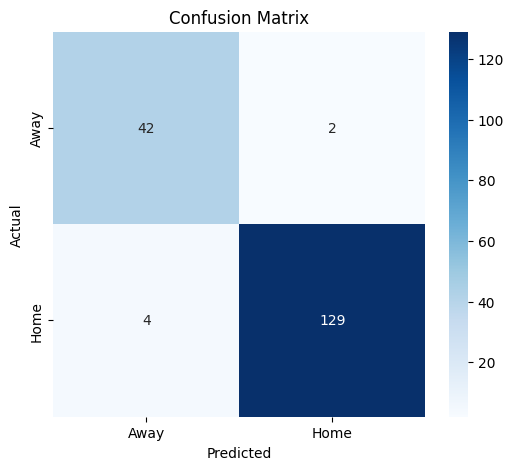

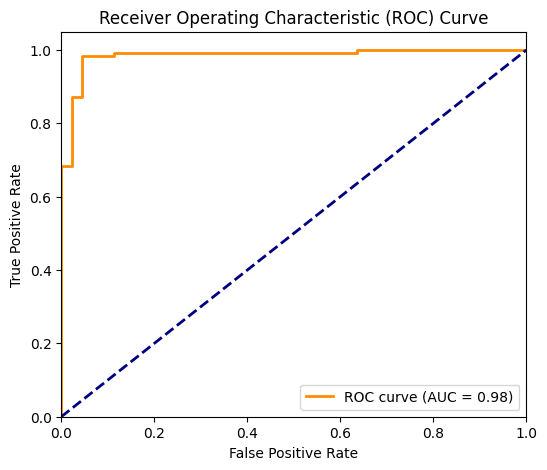

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(predictions):
    # Convert predictions to Pandas DataFrame for easy manipulation
    y_true = predictions.select("target").toPandas()
    y_pred = predictions.select("prediction").toPandas()
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Away", "Home"], yticklabels=["Away", "Home"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Function to plot AUC-ROC curve
def plot_auc_roc(predictions):
    # Get true labels and predicted probabilities
    y_true = predictions.select("target").toPandas()
    y_pred_prob = predictions.select("probability").toPandas()
    
    # Convert probabilities to the probability of the positive class
    y_pred = [prob[1] for prob in y_pred_prob["probability"]]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage to plot confusion matrix and AUC-ROC curve
# Calculate confusion matrix plot
plot_confusion_matrix(predictions)

# Calculate AUC-ROC curve plot
plot_auc_roc(predictions)
